## Problem Statement:
**Predict the Score of an student based on No.of study hours.**

In [6]:
# Import all the Required Libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [23]:
# Import Dataset
data=pd.read_csv('Task_1.csv')

In [24]:
# First Five columns
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [25]:
# last five columns
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [26]:
# It gives short info about data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [27]:
# Check for any null values in our data
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Data Analysis

C:\Users\Digital\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

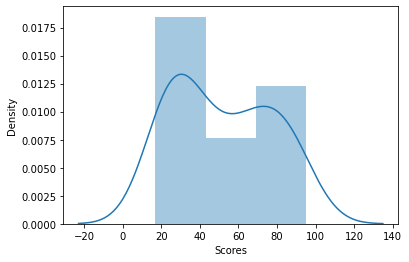

In [91]:
# Check if their is skewness in our data
sns.distplot(data['Scores'])

C:\Users\Digital\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

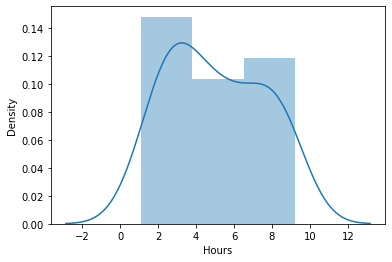

In [33]:
sns.distplot(data['Hours'])

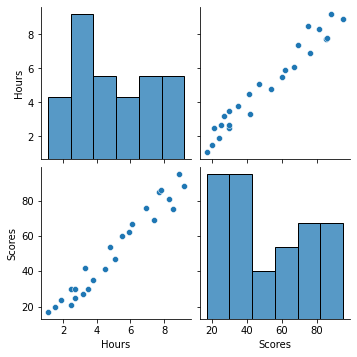

In [36]:
# relation between two variables 
sns.pairplot(data)

### Graph shows their is linear releationship between two variables.


In [37]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

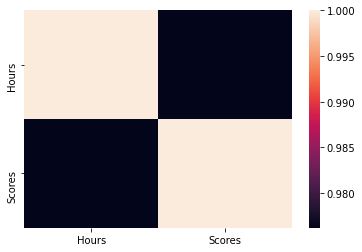

In [39]:
# Correleation between No. of Hours & Scores
sns.heatmap(data.corr())

Heatmap shows their is very high Correlation between these two features.

### Model Building using Simple Linear Regression

In [62]:
## Independent variable
X=data[['Hours']] 

In [63]:
# Dependent variable
y=data[['Scores']]

In [64]:
# Splitting a dataset into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [65]:
# import linear regression 
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(X_train, y_train)
    

LinearRegression()

In [66]:
y_pred=lm.predict(X_train)

In [76]:
y_pred=lm.predict(X_test)
pred

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [68]:
y_test

,Scores
5,20
2,27
19,69
16,30
11,62
22,35
17,24
24,86


In [88]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [90]:
# Check Accuracy of our model
print('R squared using linear regression:',r2_score(y_test,y_pred))
print('Mean squared error using linear regression:',mean_squared_error(y_test,y_pred))
print('Root mean squared error using linear regression:',np.sqrt(mean_squared_error(y_test,y_pred)))


R squared using linear regression: 0.9568211104435257
Mean squared error using linear regression: 22.96509721270043
Root mean squared error using linear regression: 4.792191274636315


In [87]:
#Predicting the Score who studied for 9.5 Hours
score=lm.predict([[9.25]])
print('If student studied 9.25 hrs/day he is likely to score {}%'.format(*score))

If student studied 9.25 hrs/day he is likely to score [92.91505723]%
